<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.175018,54.192524,-47.266116,116.101425,143.416667,-27.315242
1,0.0,1.0,70.802324,60.058809,104.573094,245.434226,130.839790,114.594436
2,0.0,2.0,64.227087,30.336585,-11.687075,92.876597,100.279263,-7.402665
3,0.0,3.0,97.450682,59.377683,78.453351,245.281715,146.947189,98.334526
4,0.0,4.0,90.256756,69.932735,-188.443961,-18.254470,151.823609,-170.078079
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.888613,93.268494,-171.454950,-23.297843,142.341381,-165.639224
249996,999.0,246.0,20.664503,69.838588,78.607229,179.110321,71.551049,107.559272
249997,999.0,247.0,46.603900,65.058898,-217.360584,-95.697785,109.859422,-205.557207
249998,999.0,248.0,57.831776,55.566613,12.273903,135.672292,117.122515,18.549777


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.175018,54.192524,-47.266116,116.101425,143.416667,-27.315242
1,0.0,1.0,70.802324,60.058809,104.573094,245.434226,130.839790,114.594436
2,0.0,2.0,64.227087,30.336585,-11.687075,92.876597,100.279263,-7.402665
3,0.0,3.0,97.450682,59.377683,78.453351,245.281715,146.947189,98.334526
4,0.0,4.0,90.256756,69.932735,-188.443961,-18.254470,151.823609,-170.078079
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.888613,93.268494,-171.454950,-23.297843,142.341381,-165.639224
249996,999.0,246.0,20.664503,69.838588,78.607229,179.110321,71.551049,107.559272
249997,999.0,247.0,46.603900,65.058898,-217.360584,-95.697785,109.859422,-205.557207
249998,999.0,248.0,57.831776,55.566613,12.273903,135.672292,117.122515,18.549777


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.175018,54.192524,-47.266116,116.101425,143.416667,-27.315242
1,0.0,1.0,70.802324,60.058809,104.573094,245.434226,130.839790,114.594436
2,0.0,2.0,64.227087,30.336585,-11.687075,92.876597,100.279263,-7.402665
3,0.0,3.0,97.450682,59.377683,78.453351,245.281715,146.947189,98.334526
4,0.0,4.0,90.256756,69.932735,-188.443961,-18.254470,151.823609,-170.078079
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.888613,93.268494,-171.454950,-23.297843,142.341381,-165.639224
249996,999.0,246.0,20.664503,69.838588,78.607229,179.110321,71.551049,107.559272
249997,999.0,247.0,46.603900,65.058898,-217.360584,-95.697785,109.859422,-205.557207
249998,999.0,248.0,57.831776,55.566613,12.273903,135.672292,117.122515,18.549777


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

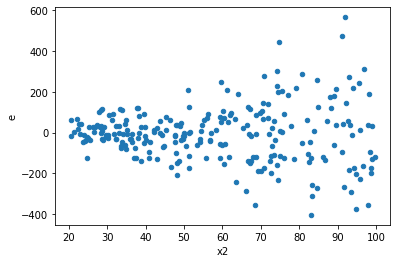

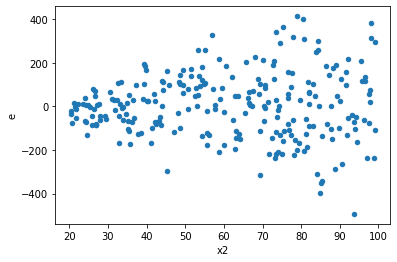

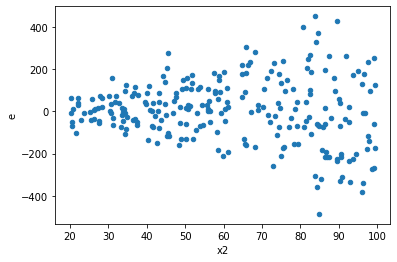

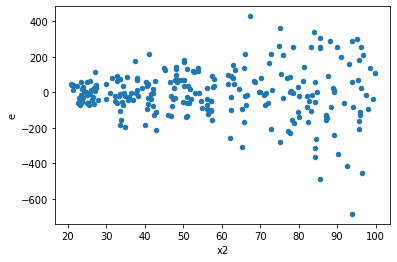

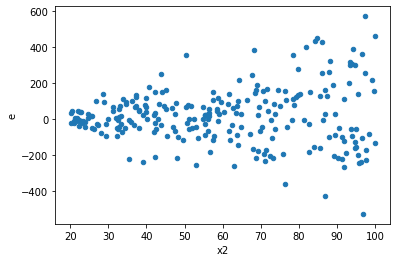

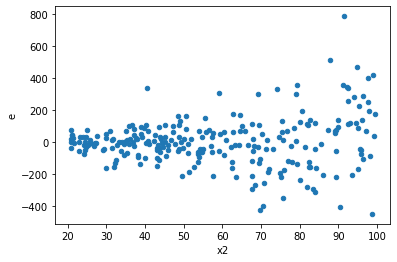

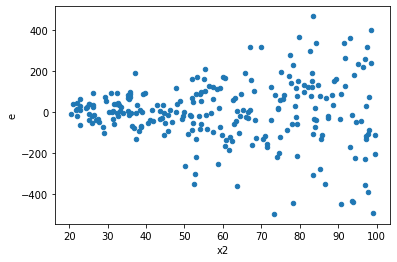

In [19]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[3.0]
tablenew3 = table.loc[4.0]
tablenew4 = table.loc[5.0]
tablenew5 = table.loc[6.0]
tablenew6 = table.loc[8.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,541011.478028014,3344551.024954954,5520.525286000142,34128.07168321382,6.182033396307668,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,1111403.4686185888,3232294.4385005096,11340.851720597844,32982.59631122969,2.908299757709113,2.5590640917450003e-07,0.9999998720467954,1.2795320458725001e-07,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,2261066.9689354585,2741097.4265359305,23072.11192791284,27970.38190342786,1.212302627120539,0.34222675309656214,0.8288866234517189,0.17111337654828107,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,605012.1519124411,3804531.175204209,6173.593386861644,38821.746685757236,6.288354974653155,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,846879.8662162684,3365117.579999418,8641.631287921105,34337.93448978998,3.973547741823473,5.111000511703878e-11,0.999999999974445,2.555500255851939e-11,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,717999.6298864458,4235751.060683934,7326.526835575978,43221.949598815656,5.899377777330934,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,443454.69002419536,4221176.093021808,4525.047857389749,43073.225438998044,9.518844175019314,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,1862966.2310393592,2079525.8679427856,19009.859500401624,21219.651713701893,1.1162445315944383,0.5872672591141073,0.7063663704429464,0.29363362955705363,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,578396.2347296808,3429088.7799254595,5902.002395200825,34990.701835974076,5.9286153228989775,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,541011.478028014,3344551.024954954,5520.525286000142,34128.07168321382,6.182033396307668,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,1111403.4686185888,3232294.4385005096,11340.851720597844,32982.59631122969,2.908299757709113,2.5590640917450003e-07,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,2261066.9689354585,2741097.4265359305,23072.11192791284,27970.38190342786,1.212302627120539,0.34222675309656214,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,605012.1519124411,3804531.175204209,6173.593386861644,38821.746685757236,6.288354974653155,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,846879.8662162684,3365117.579999418,8641.631287921105,34337.93448978998,3.973547741823473,5.111000511703878e-11,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,717999.6298864458,4235751.060683934,7326.526835575978,43221.949598815656,5.899377777330934,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,443454.69002419536,4221176.093021808,4525.047857389749,43073.225438998044,9.518844175019314,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,1862966.2310393592,2079525.8679427856,19009.859500401624,21219.651713701893,1.1162445315944383,0.5872672591141073,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,578396.2347296808,3429088.7799254595,5902.002395200825,34990.701835974076,5.9286153228989775,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    855
Reject001=1 : Homoscedasticity      145
Name: Result_test, dtype: int64